# Enunciado

Vamos obter informações sobre o rendimento de alunos de um curso em algumas disciplinas ao longo dos anos.

O primeiro arquivo contido no Dataset Notas, historico-alg1_SIGA_ANONIMIZADO.csv, refere-se ao aproveitamento de estudantes na disciplina ALGORITMOS 1 entre os anos de 2011 e 2022.

A primeira coluna ("matricula") é composta por números inteiros, onde cada número representa um indivíduo. Assim, repetições nessa coluna indicam que o estudante fez mais de uma vez a mesma matéria.

Atenção: R-nota indica REPROVAÇÃO POR NOTA e R-freq REPROVAÇÃO POR FALTA. Se houver outro "status" para representar reprovação, este dever ser trocado para o rótulo adequado (R-nota ou R-freq). Frequências < 75 causam reprovação por falta; Médias abaixo de 50 causam reprovação por nota.

Analise o dataset do referido arquivo para responder as seguintes perguntas:

1. Qual é a média de nota dos aprovados (no período total e por ano)?

2. Qual é a média de nota dos reprovados por nota (período total e ano)?

3. Qual é a frequência dos reprovados por nota (período total e por ano)?

4. Qual a porcentagem de evasões (total e anual)?

5. Como os anos de pandemia impactaram no rendimento dos estudantes em relação aos anos anteriores, considerando o rendimento dos aprovados, a taxa de cancelamento e as reprovações? Considere como anos de pandemia os anos de 2020 e 2021.

6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.

7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.

# Importações

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

# Carregando Dados

In [ ]:
df = pd.read_csv('historico-alg1_SIGA_ANONIMIZADO.csv')

# Análise Descritiva dos Dados

## Dimensão do Dataset

In [ ]:
print(f'Número de linhas {df.shape[0]}')
print(f'Número de colunas {df.shape[1]}')

Número de linhas 909
Número de colunas 16


## Tratamento Valores Nulos

In [ ]:
df.isna().sum()/df.shape[0]

matricula             0.000000
codigo                0.000000
disciplina            0.000000
periodo               0.000000
ano                   0.000000
curriculo             0.000000
ch                    0.000000
nota                  0.000000
frequencia            0.000000
status                0.000000
tipo                  0.000000
observacao            0.970297
natureza              0.000000
situacaoDiscente      0.000000
nomeTuma              0.265127
codigoCurriculoSie    0.000000
dtype: float64

In [ ]:
df.sample(10)

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
108,61,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,0,Aprovado,EQUIVALENCIA,NaN,Obrigatória,Registro ativo,NaN,21A
855,540,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2022,Sim,60,0,0,Matriculado,TURMA,NaN,Obrigatória,Registro ativo,BCC1,21A
550,352,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,2,2015,Sim,60,80,80,Aprovado,TURMA,NaN,Obrigatória,Registro ativo,B,21A
145,83,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2019,Sim,60,89,76,Aprovado,TURMA,NaN,Obrigatória,Registro ativo,B,21A
446,283,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2020,Sim,60,0,100,Cancelado,TURMA,NaN,Obrigatória,Registro ativo,A,21A
596,383,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2020,Sim,60,0,0,Cancelado,TURMA,NaN,Obrigatória,Registro ativo,ERE 2 - A,21A
128,74,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2020,Sim,60,47,75,R-nota,TURMA,NaN,Obrigatória,Registro ativo,A,21A
487,307,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2016,Sim,60,82,96,Aprovado,TURMA,NaN,Obrigatória,Conclusão formatura,D,21A
847,537,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,0,Aprovado,EQUIVALENCIA,NaN,Obrigatória,Trancamento,NaN,21A
572,367,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,0,Aprovado,EQUIVALENCIA,NaN,Obrigatória,Registro ativo,NaN,21A


Os valores nulos nas colunas 'observacao' e 'nomeTuma' não parecer ser problemas para as análises propostas aqui, por isso as colunas serão simplesmente removidas

In [ ]:
df = df.drop(columns=['observacao','nomeTuma'], axis =1)

## Tratamento Tipo dos Dados

In [ ]:
df.sample()

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,natureza,situacaoDiscente,codigoCurriculoSie
550,352,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,2,2015,Sim,60,80,80,Aprovado,TURMA,Obrigatória,Registro ativo,21A


In [ ]:
df.dtypes

matricula              int64
codigo                object
disciplina            object
periodo               object
ano                    int64
curriculo             object
ch                     int64
nota                   int64
frequencia             int64
status                object
tipo                  object
natureza              object
situacaoDiscente      object
codigoCurriculoSie    object
dtype: object

In [ ]:
df.loc[df['periodo'] == 'Anual', 'periodo'] = '2'
df['periodo'] = df['periodo'].astype('int64')

Todas as colunas parecerm estar com o tipo de dado adequado, apena a coluna periodo que possui números mas possui uma categoria 'Anual' e portante será mantida como string

## Distribuição dos Dados

In [ ]:
num_atributes = df.select_dtypes(include=['int64','float64'])
cat_atributes = df.select_dtypes(exclude=['int64','float64'])

### Variáveis Númericos

In [ ]:
num_atributes.describe()

,matricula,periodo,ano,ch,nota,frequencia
count,909.000000,909.000000,909.000000,909.0,909.000000,909.000000
mean,287.009901,1.193619,2019.002200,60.0,45.251925,70.081408
std,171.329142,0.395352,2.160416,0.0,36.945658,42.035699
min,0.000000,1.000000,2011.000000,60.0,0.000000,0.000000
25%,134.000000,1.000000,2018.000000,60.0,0.000000,0.000000
50%,288.000000,1.000000,2019.000000,60.0,53.000000,93.000000
75%,437.000000,1.000000,2021.000000,60.0,79.000000,100.000000
max,572.000000,2.000000,2022.000000,60.0,100.000000,100.000000


### Variáveis Categoricas

In [ ]:
features

['codigo',
 'disciplina',
 'curriculo',
 'status',
 'tipo',
 'natureza',
 'situacaoDiscente',
 'codigoCurriculoSie']

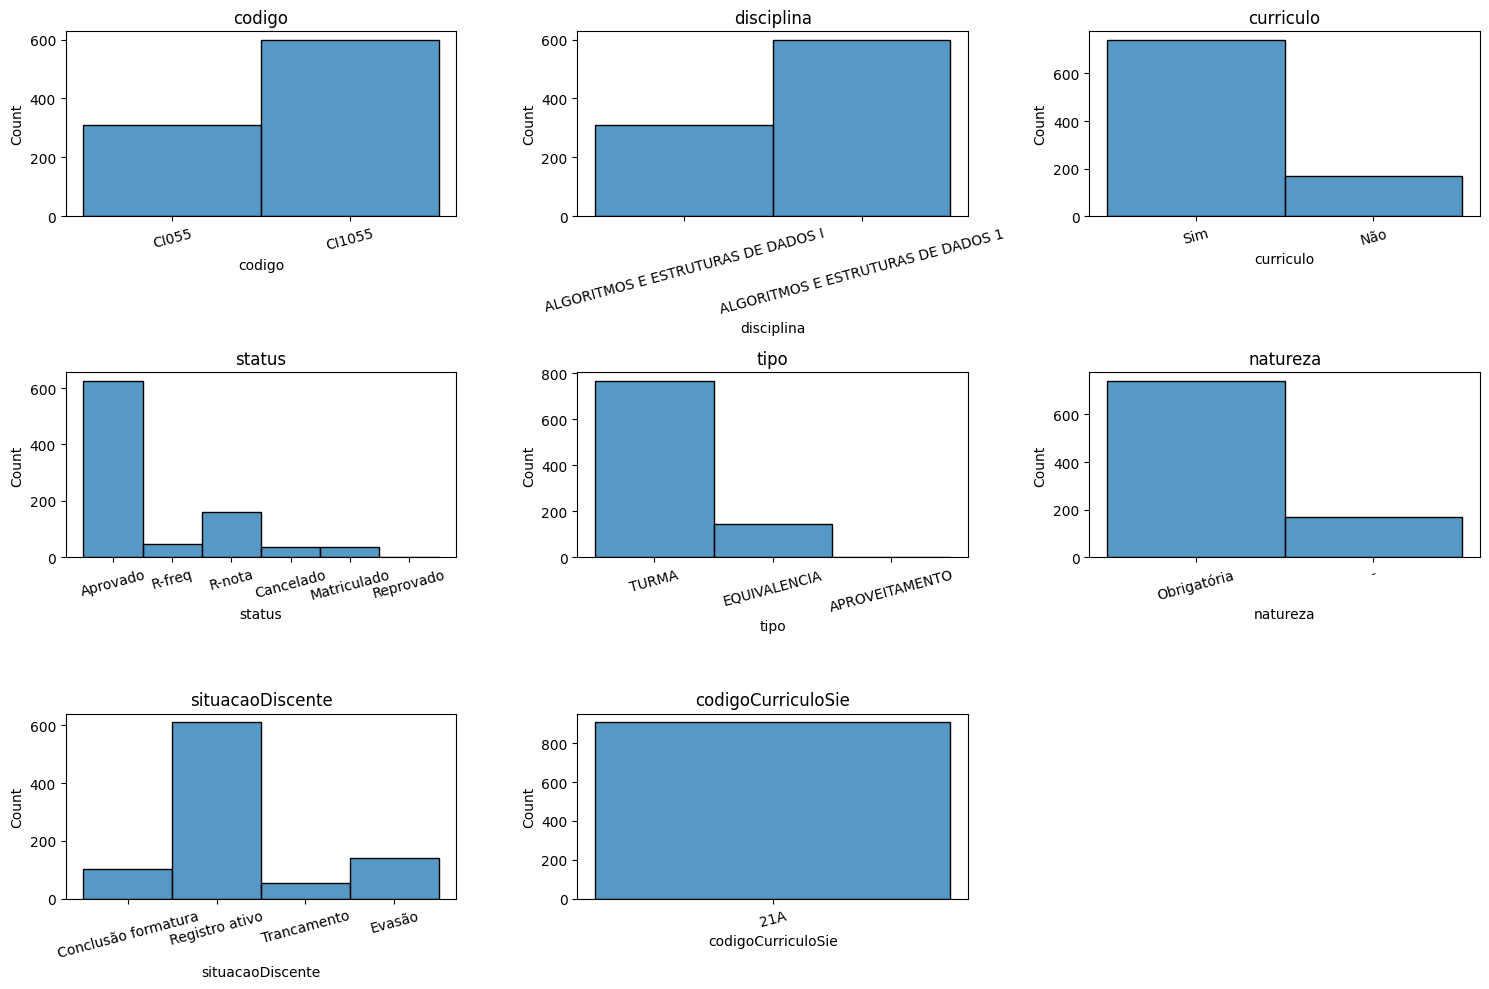

In [ ]:
features = cat_atributes.columns.tolist()
ncols = 3 if int(np.ceil(np.sqrt(len(features)))) > 3 else int(np.ceil(np.sqrt(len(features))))
nrows = int(np.ceil(len(features)/ncols))

plt.figure(figsize=(15,10))
for col in cat_atributes.columns.tolist():
    plt.subplot(nrows,ncols,features.index(col)+1)
    plt.title(col)
    sns.histplot(cat_atributes[col])
    plt.xticks(rotation=15)

plt.tight_layout()

Notamos que o na coluna status há um valor identificado como 'Reprovado' sem especificar se a reprovação foi pro frequencia ou nota. Assim, esse valor será corrigido considerando primeiro a reprovação por frequencia, tendo a premissa que ela sempre ocorrerá primeiro que a reprovação por nota

### Corrigindo valores

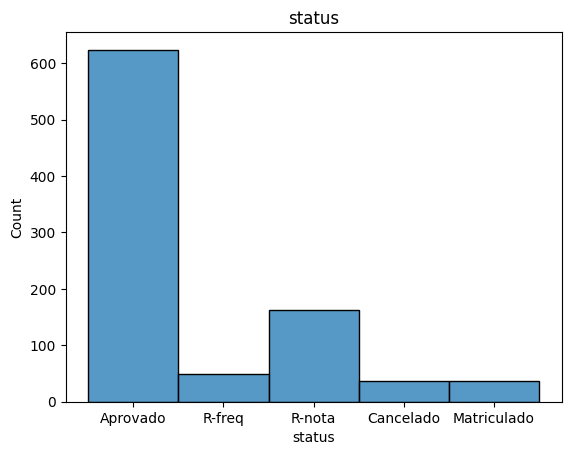

In [ ]:
df.loc[df['status'] == 'Reprovado','status'] = df.loc[df['status'] == 'Reprovado'].apply(lambda x: 'R-freq' if x['frequencia'] < 75 else 'R-nota' if x['nota'] < 50 else x['status'], axis = 1)
plt.title('status')
sns.histplot(df['status']);

# Análise Exploratória

In [ ]:
df

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,natureza,situacaoDiscente,codigoCurriculoSie
0,0,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2016,Sim,60,67,96,Aprovado,TURMA,Obrigatória,Conclusão formatura,21A
1,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,73,R-freq,TURMA,Obrigatória,Registro ativo,21A
2,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2019,Sim,60,11,76,R-nota,TURMA,Obrigatória,Registro ativo,21A
3,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2020,Sim,60,0,0,Cancelado,TURMA,Obrigatória,Registro ativo,21A
4,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2020,Sim,60,0,0,Cancelado,TURMA,Obrigatória,Registro ativo,21A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,569,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2015,Sim,60,0,0,Aprovado,EQUIVALENCIA,Obrigatória,Evasão,21A
905,570,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2022,Sim,60,70,100,Aprovado,TURMA,Obrigatória,Registro ativo,21A
906,571,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2018,Não,60,98,100,Aprovado,TURMA,-,Registro ativo,21A
907,571,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,0,Aprovado,EQUIVALENCIA,Obrigatória,Registro ativo,21A


## Análise Univariada

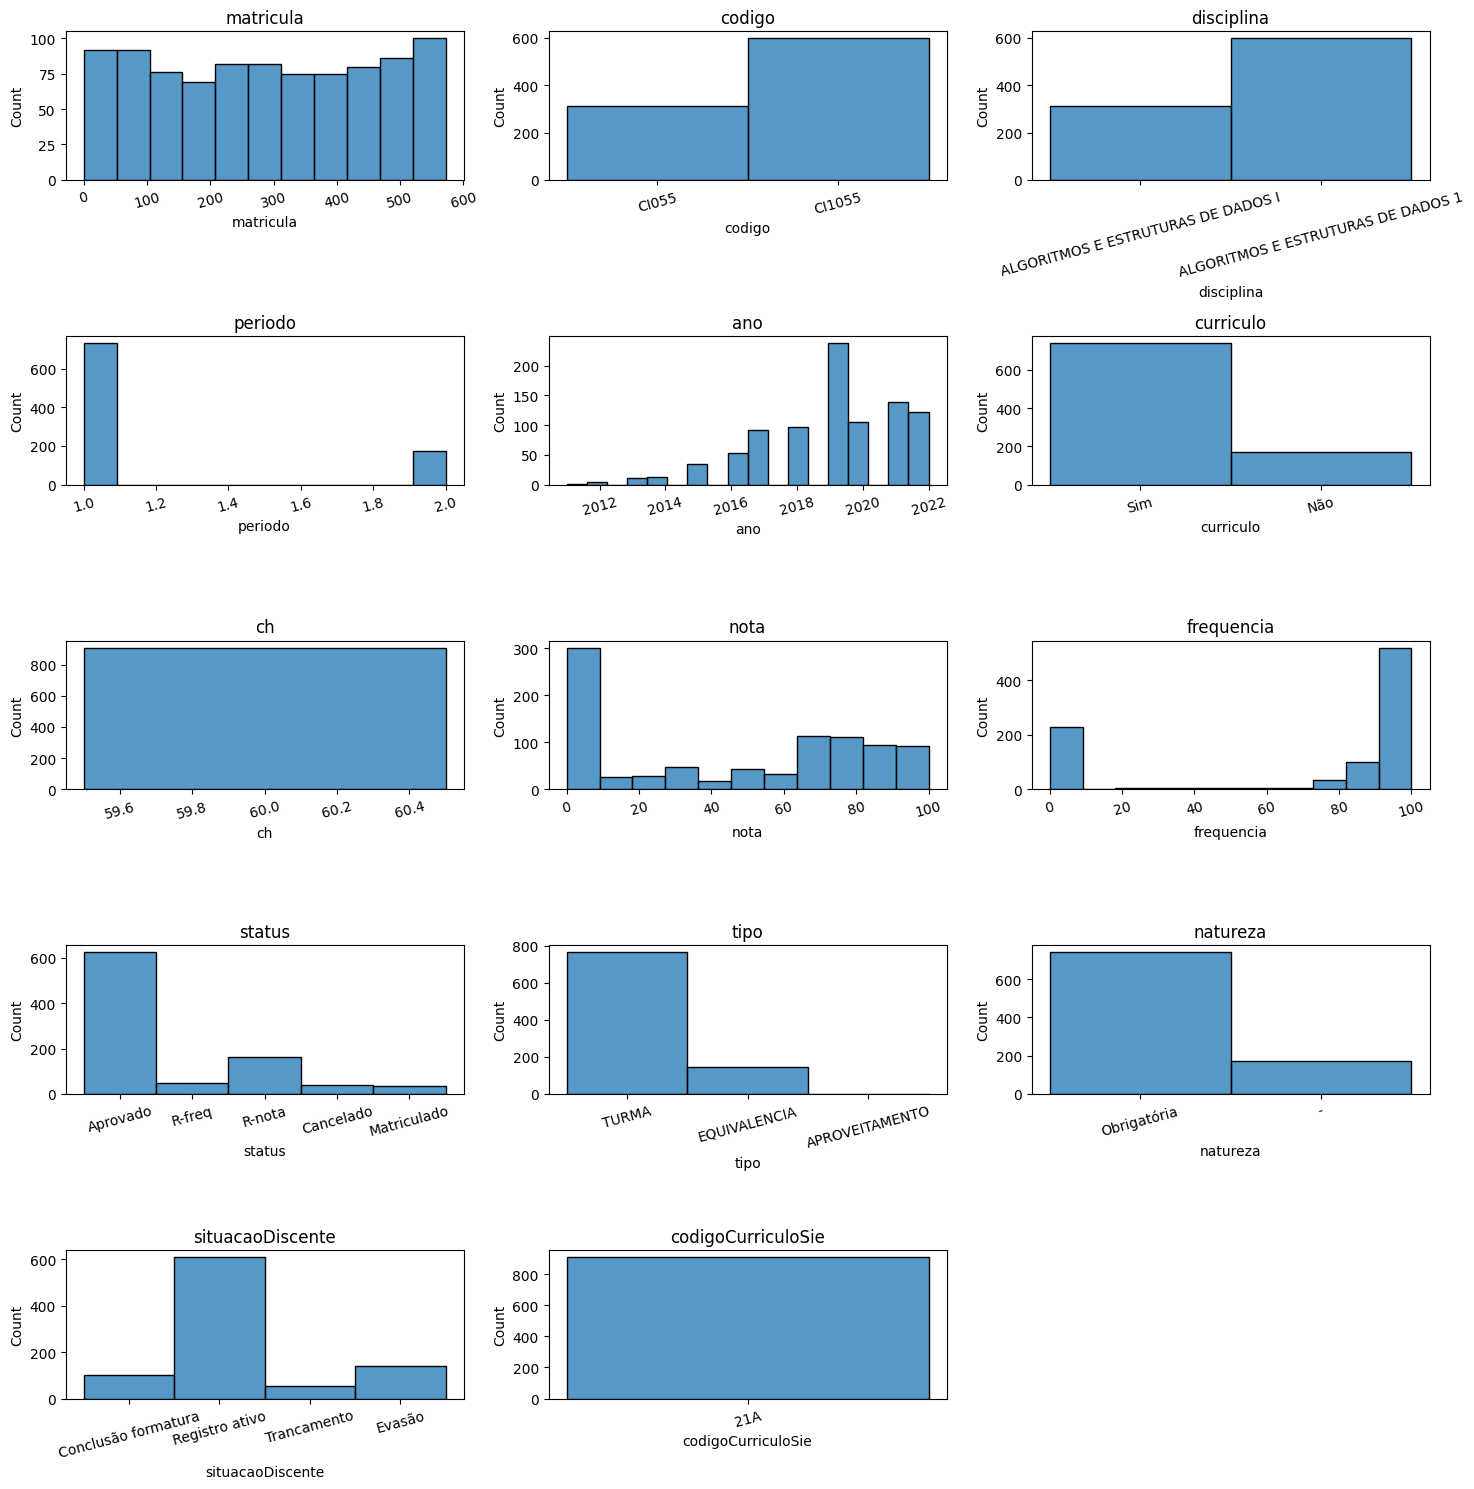

In [ ]:
features = df.columns.tolist()
ncols = 3 if int(np.ceil(np.sqrt(len(features)))) > 3 else int(np.ceil(np.sqrt(len(features)))) > 3
nrows = int(np.ceil(len(features)/ncols))

plt.figure(figsize=(15,15))
for col in features:
    try:
        plt.subplot(nrows,ncols,features.index(col)+1)
    except:
        break
    plt.title(col)
    sns.histplot(df[col])
    plt.xticks(rotation=15)

plt.tight_layout()

## Respostas do Trabalho

1. Qual é a média de nota dos aprovados (no período total e por ano)?

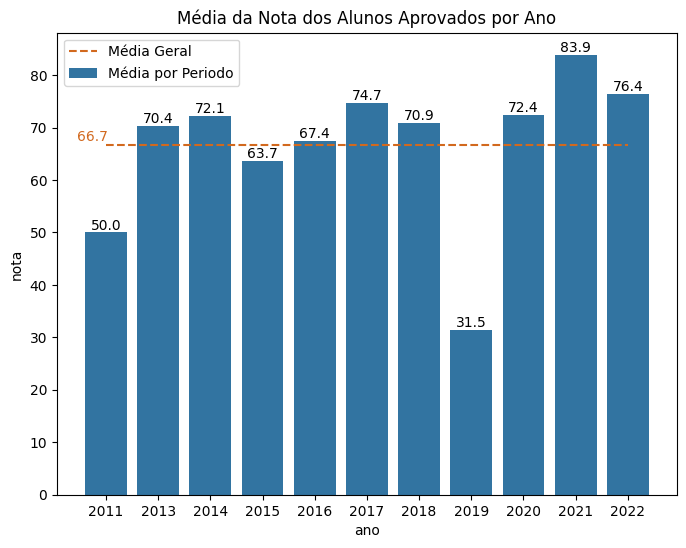

In [ ]:
df_aux = df.loc[df['status'] == 'Aprovado', ['ano', 'nota']].groupby('ano').mean().reset_index()
df_aux['mean'] = df_aux['nota'].mean()

plt.figure(figsize = (8,6))
plt.title('Média da Nota dos Alunos Aprovados por Ano')

g = sns.barplot(x='ano', y='nota', data = df_aux, label = 'Média por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.1f')

sns.lineplot(df_aux['mean'], linestyle='--', color = 'chocolate', label = 'Média Geral')
plt.figtext(0.15,0.7,round(df_aux['nota'].mean(),1), color='chocolate')

plt.legend()


### 2. Qual é a média de nota dos reprovados por nota (período total e ano)?

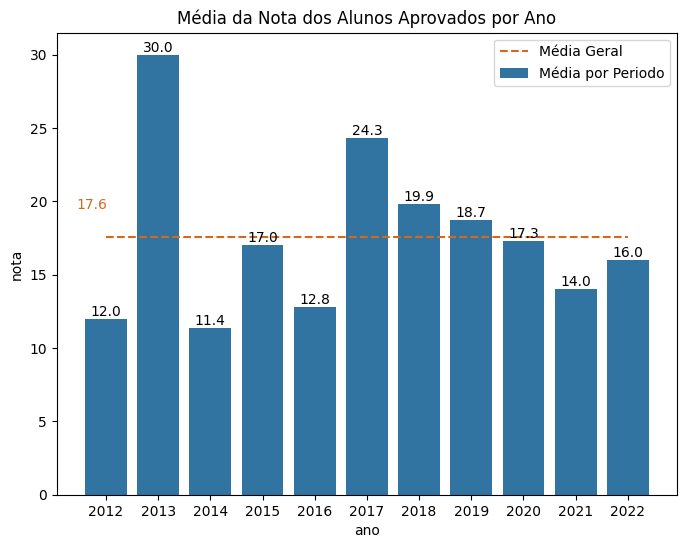

In [ ]:
df_aux = df.loc[df['status'].isin(['R-freq', 'R-nota']), ['ano', 'nota']].groupby('ano').mean().reset_index()
df_aux['media_reprovados'] = df_aux['nota'].mean()

plt.figure(figsize = (8,6))
plt.title('Média da Nota dos Alunos Aprovados por Ano')

g = sns.barplot(x='ano', y='nota', data = df_aux, label = 'Média por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.1f')

sns.lineplot(df_aux['media_reprovados'], linestyle='--', color = 'chocolate', label = 'Média Geral')
plt.figtext(0.15,df_aux['media_reprovados'].max()/df_aux['nota'].max() ,round(df_aux['media_reprovados'].mean(),1), color='chocolate')

plt.legend();

### 3. Qual é a frequência dos reprovados por nota (período total e por ano)?

In [ ]:
df_aux['media_reprovados'].max()/df_aux['frequencia'].max()

0.7788679245283019

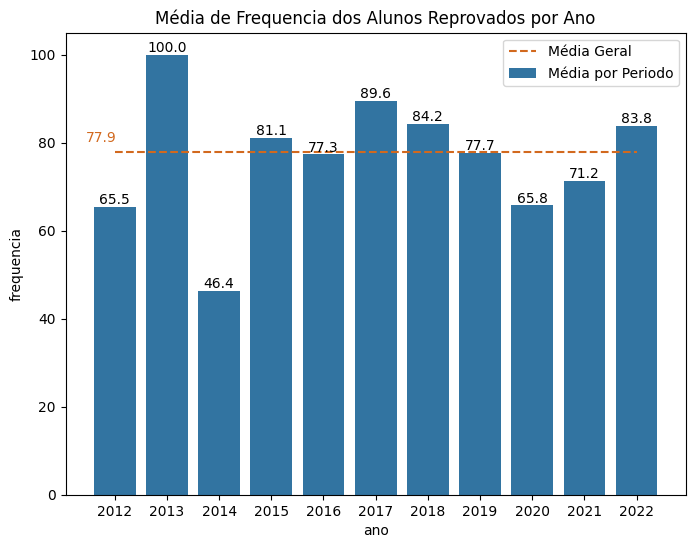

In [ ]:
df_aux = df.loc[df['status'].isin(['R-freq', 'R-nota']), ['ano', 'frequencia']].groupby('ano').mean().reset_index()
df_aux['media_reprovados'] = df.loc[df['status'].isin(['R-freq', 'R-nota']), 'frequencia'].mean()

plt.figure(figsize = (8,6))
plt.title('Média de Frequencia dos Alunos Reprovados por Ano')

g = sns.barplot(x='ano', y='frequencia', data = df_aux, label = 'Média por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.1f')

sns.lineplot(df_aux['media_reprovados'], linestyle='--', color = 'chocolate', label = 'Média Geral')
plt.figtext(0.15,df_aux['media_reprovados'].max()/df_aux['frequencia'].max() -0.08 ,round(df_aux['media_reprovados'].mean(),1), color='chocolate')

plt.legend();

### 4. Qual a porcentagem de evasões (total e anual)?

In [ ]:
df_aux = pd.crosstab(df['ano'], df['situacaoDiscente'], normalize='index')['Evasão'].reset_index()
df_aux['media_periodo'] = df.loc[df['situacaoDiscente'] == 'Evasão'].shape[0]/df.shape[0]

,ano,Evasão,media_periodo
0,2011,0.000000,0.156216
1,2012,0.000000,0.156216
2,2013,0.636364,0.156216
3,2014,0.230769,0.156216
4,2015,0.200000,0.156216
5,2016,0.150943,0.156216
6,2017,0.184783,0.156216
7,2018,0.229167,0.156216
8,2019,0.163866,0.156216
9,2020,0.179245,0.156216


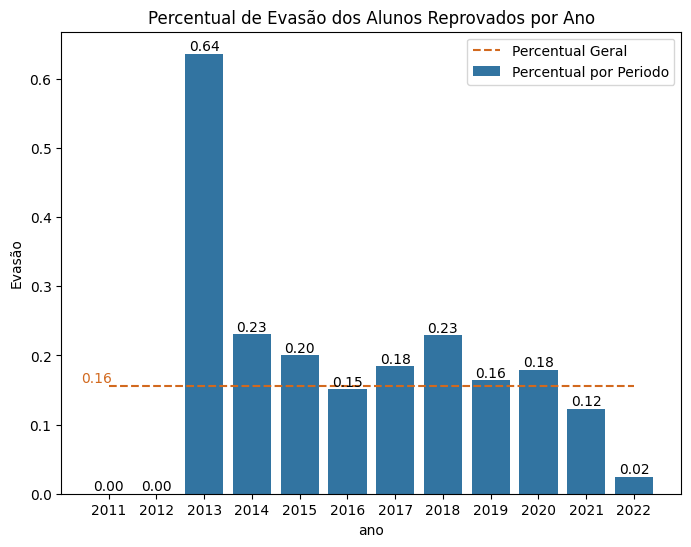

In [ ]:

plt.figure(figsize = (8,6))
plt.title('Percentual de Evasão dos Alunos Reprovados por Ano')

g = sns.barplot(x='ano', y='Evasão', data = df_aux, label = 'Percentual por Periodo')
for i in g.containers:
    g.bar_label(container=i, label_type='edge', color='black', fmt='%.2f')

sns.lineplot(df_aux['media_periodo'], linestyle='--', color = 'chocolate', label = 'Percentual Geral')
plt.figtext(0.15,df_aux['media_periodo'].max()/df_aux['Evasão'].max() + 0.05,round(df_aux['media_periodo'].mean(),2), color='chocolate')

plt.legend();

### 5. Como os anos de pandemia impactaram no rendimento dos estudantes em relação aos anos anteriores, considerando o rendimento dos aprovados, a taxa de cancelamento e as reprovações? Considere como anos de pandemia os anos de 2020 e 2021.

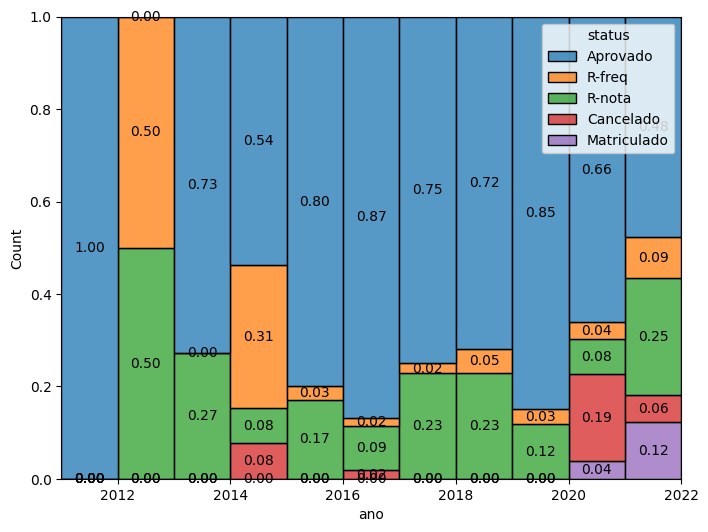

In [ ]:
df_aux = df.copy()
# df_aux['status'] = df_aux['status'].replace({'R-freq':'Reprovado','R-nota':'Reprovado'})

plt.figure(figsize = (8,6))
g = sns.histplot(x = 'ano', hue = 'status', multiple = 'fill', data = df_aux, bins=len(df_aux['ano'].unique())-1)
for i in g.containers:
    g.bar_label(i, label_type = 'center', fmt = '%.2f', color='black')

### 6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.

reprovações menores

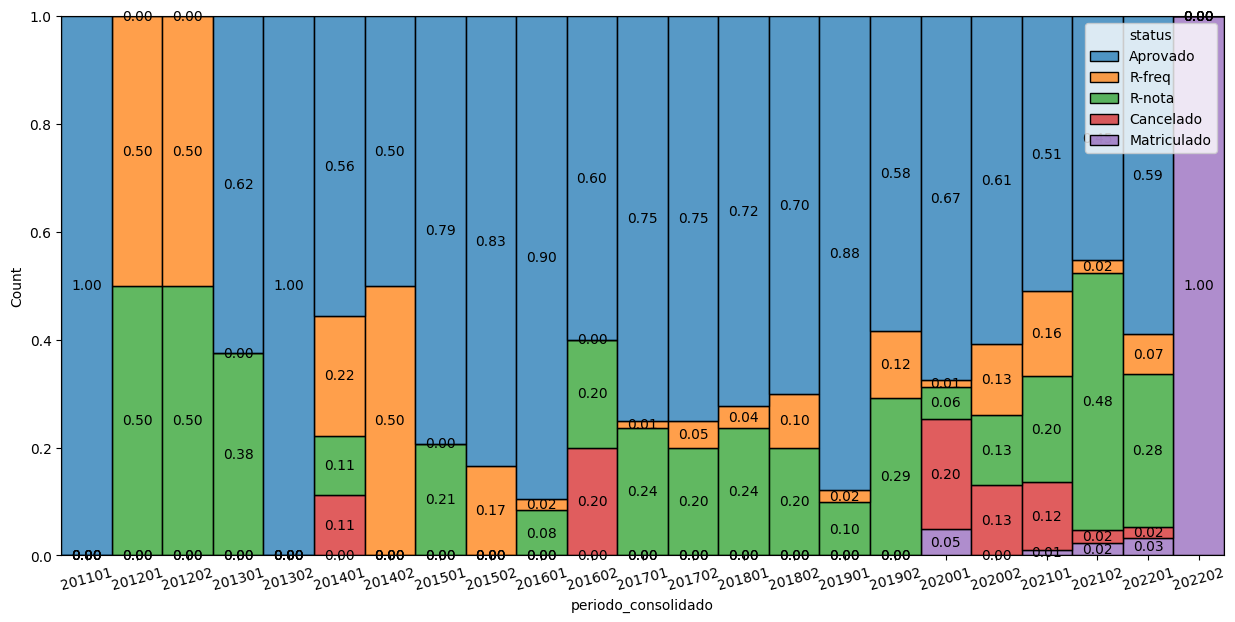

In [ ]:
df_aux = df.copy()
# df_aux['status'] = df_aux['status'].replace({'R-freq':'Reprovado','R-nota':'Reprovado'})
df_aux['periodo_consolidado'] = df_aux['ano']*100 +  df_aux['periodo']
df_aux['periodo_consolidado'] = df_aux['periodo_consolidado'].astype(str)

plt.figure(figsize = (15,7))
g = sns.histplot(x = 'periodo_consolidado', hue = 'status', multiple = 'fill', data = df_aux.sort_values(by='periodo_consolidado'), bins=len(df_aux['periodo_consolidade'].unique())-1)
for i in g.containers:
    g.bar_label(i, label_type = 'center', fmt = '%.2f', color='black')

plt.xticks(rotation = 15);


7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.

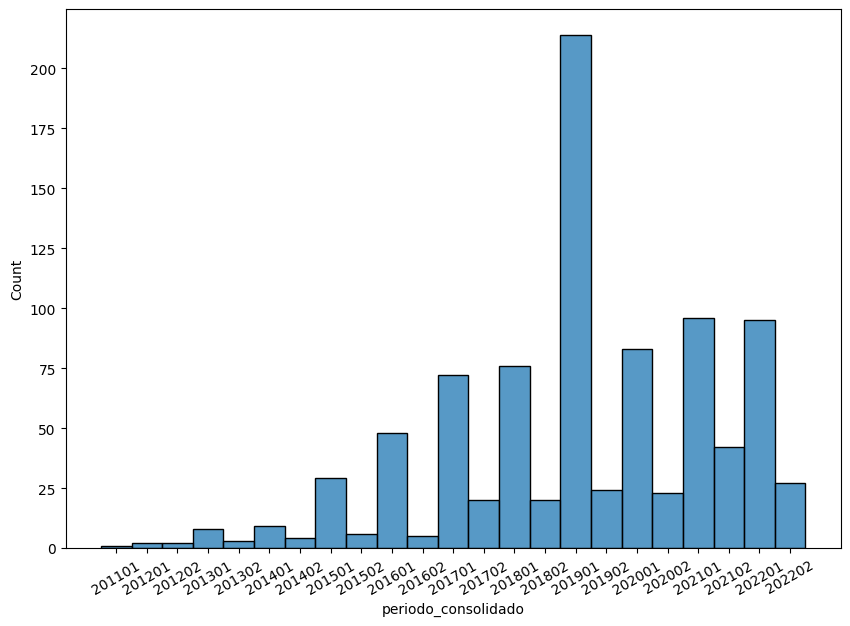

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(x = 'periodo_consolidado', data = df_aux.sort_values(by='periodo_consolidado'), bins=len(df_aux['periodo_consolidade'].unique())-1)
plt.xticks(rotation=30);